<h1>Instagram Reach Analysis</h1>
Instagram generates a lot of data every day. When content creators post on Instagram, they do look at their engagement and reach to find the category of posts they should post more. Here’s the Instagram Data we collected from the account of the founder of Statso. 

Below are all the features in the data:

- Impressions: Number of impressions in a post (Reach)
- From Home: Reach from home
- From Hashtags: Reach from Hashtags
- From Explore: Reach from Explore
- From Other: Reach from other sources
- Saves: Number of saves
- Comments: Number of comments
- Shares: Number of shares
- Likes: Number of Likes
- Profile Visits: Numer of profile visits from the post
- Follows: Number of Follows from the post
- Caption: Caption of the post
- Hashtags: Hashtags used in the post

In [124]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import string

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



<h2>ETL Process</h2>
For a better understanding the data- I'll first extract the data, transform it to meaningfull metrics and load it to a final dataframe for further investigation.<br>

<h3>Extract</h3>

In [125]:
file_path="/Users/shahardekel/Desktop/python_projects/instagram_reach/Instagram_data.csv"
all_data=pd.read_csv(file_path, encoding='latin1')
all_data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


<h3>Trasfrom</h3>

In [126]:
all_data.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

For a smoother and error free way in the columns- I'll change the columns names with:
- change to lower case letters
- replace the spaces with '_'

In [127]:
all_data.columns = all_data.columns.str.strip().str.lower().str.replace(' ', '_')
all_data.columns

Index(['impressions', 'from_home', 'from_hashtags', 'from_explore',
       'from_other', 'saves', 'comments', 'shares', 'likes', 'profile_visits',
       'follows', 'caption', 'hashtags'],
      dtype='object')

In [128]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   impressions     119 non-null    int64 
 1   from_home       119 non-null    int64 
 2   from_hashtags   119 non-null    int64 
 3   from_explore    119 non-null    int64 
 4   from_other      119 non-null    int64 
 5   saves           119 non-null    int64 
 6   comments        119 non-null    int64 
 7   shares          119 non-null    int64 
 8   likes           119 non-null    int64 
 9   profile_visits  119 non-null    int64 
 10  follows         119 non-null    int64 
 11  caption         119 non-null    object
 12  hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [129]:
#find null values in the dataset
all_data.isnull().sum()

impressions       0
from_home         0
from_hashtags     0
from_explore      0
from_other        0
saves             0
comments          0
shares            0
likes             0
profile_visits    0
follows           0
caption           0
hashtags          0
dtype: int64

In [130]:
#find duplicated rows
all_data.duplicated().sum()

17

In [131]:
#drop duplicated rows- they don't add any value to the df
all_data=all_data.drop_duplicates()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   impressions     102 non-null    int64 
 1   from_home       102 non-null    int64 
 2   from_hashtags   102 non-null    int64 
 3   from_explore    102 non-null    int64 
 4   from_other      102 non-null    int64 
 5   saves           102 non-null    int64 
 6   comments        102 non-null    int64 
 7   shares          102 non-null    int64 
 8   likes           102 non-null    int64 
 9   profile_visits  102 non-null    int64 
 10  follows         102 non-null    int64 
 11  caption         102 non-null    object
 12  hashtags        102 non-null    object
dtypes: int64(11), object(2)
memory usage: 11.2+ KB


-----------------------
After cleaning the dataset, I'll preform **Feature Engineering** and calculate a few metrics I think will be helpful in analyzing the data. <br>
It enables us to create metrics and features that reflect engagement, reach, and effectiveness of posts.- which will be essential for understanding the performance of this instagram accont and optimize its future content strategies.

In [132]:
# engagement metric
all_data['engagement_rate']=100*((all_data['likes']+all_data['comments']+all_data['shares'])/all_data['impressions'])

# reach metrics- help identify which sources contribute the most for post visibility
all_data['proportion_home']=100*(all_data['from_home']/all_data['impressions'])
all_data['proportion_hashtag']=100*(all_data['from_hashtags']/all_data['impressions'])
all_data['proportion_explore']=100*(all_data['from_explore']/all_data['impressions'])
all_data['proportion_other']=100*(all_data['from_other']/all_data['impressions'])

# follower conversion- how effectively posts convert views into new followers
all_data['follows_per_visit']=100*(all_data['follows']/all_data['profile_visits']) # the percentage of profile visitors who decide to follow
all_data['follows_per_impression']=100*(all_data['follows']/all_data['impressions']) # follower conversion efficiency

# save-to-engagement ratio- tracks how much of the engagement is driven by saving content
all_data['save_ratio']=100*(all_data['saves']/(all_data['likes']+all_data['comments']+all_data['shares']))

all_data.head()

,impressions,from_home,from_hashtags,from_explore,from_other,saves,comments,shares,likes,profile_visits,...,caption,hashtags,engagement_rate,proportion_home,proportion_hashtag,proportion_explore,proportion_other,follows_per_visit,follows_per_impression,save_ratio
0,3920,2586,1028,619,56,98,9,5,162,35,...,Here are some of the most important data visua...,#finance #money #business #investing #investme...,4.489796,65.969388,26.224490,15.790816,1.428571,5.714286,0.051020,55.681818
1,5394,2727,1838,1174,78,194,7,14,224,48,...,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,4.542084,50.556174,34.074898,21.764924,1.446051,20.833333,0.185391,79.183673
2,4021,2085,1188,0,533,41,11,1,131,62,...,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,3.556329,51.852773,29.544889,0.000000,13.255409,19.354839,0.298433,28.671329
3,4528,2700,621,932,73,172,10,7,213,23,...,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,5.079505,59.628975,13.714664,20.583039,1.612191,34.782609,0.176678,74.782609
4,2518,1704,255,279,37,96,5,4,123,8,...,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,5.242256,67.672756,10.127085,11.080222,1.469420,0.000000,0.000000,72.727273


In [133]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 118
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   impressions             102 non-null    int64  
 1   from_home               102 non-null    int64  
 2   from_hashtags           102 non-null    int64  
 3   from_explore            102 non-null    int64  
 4   from_other              102 non-null    int64  
 5   saves                   102 non-null    int64  
 6   comments                102 non-null    int64  
 7   shares                  102 non-null    int64  
 8   likes                   102 non-null    int64  
 9   profile_visits          102 non-null    int64  
 10  follows                 102 non-null    int64  
 11  caption                 102 non-null    object 
 12  hashtags                102 non-null    object 
 13  engagement_rate         102 non-null    float64
 14  proportion_home         102 non-null    float64

<h3>EDA Process</h3>

**Engagement Rate Distribution**

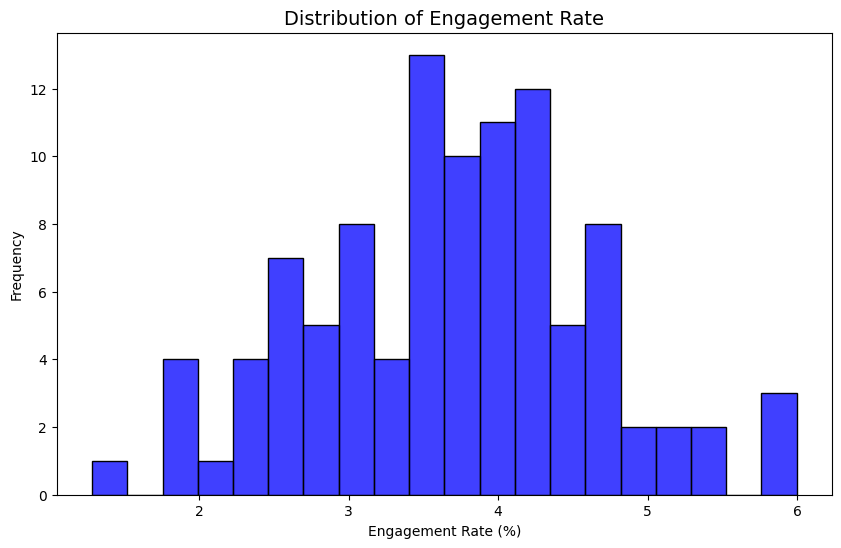

In [134]:
plt.figure(figsize=(10, 6))
sns.histplot(all_data['engagement_rate'], bins=20, color='blue')
plt.title('Distribution of Engagement Rate', fontsize=14)
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Frequency')
plt.show()


**Key Insights**
1. The distribution is centered arount 3.5% and 4.5% engagement rate, with a peak arount the 3.5% rate.
2. typical performance range is at 3%-5% engagement rate- suggesting a benchmark for future posts.

**Further Investigation**
1. analyze posts with 5% engagement rate and above, and 3% engagement rate and less.
2. investigate which hashtags lead to a better engagement rate posts
3. investigate lenghts of post captions- what is the best length for a post in terms of engagement rate?

----

**Boxplot Comparing the Proportions of Each Sources**

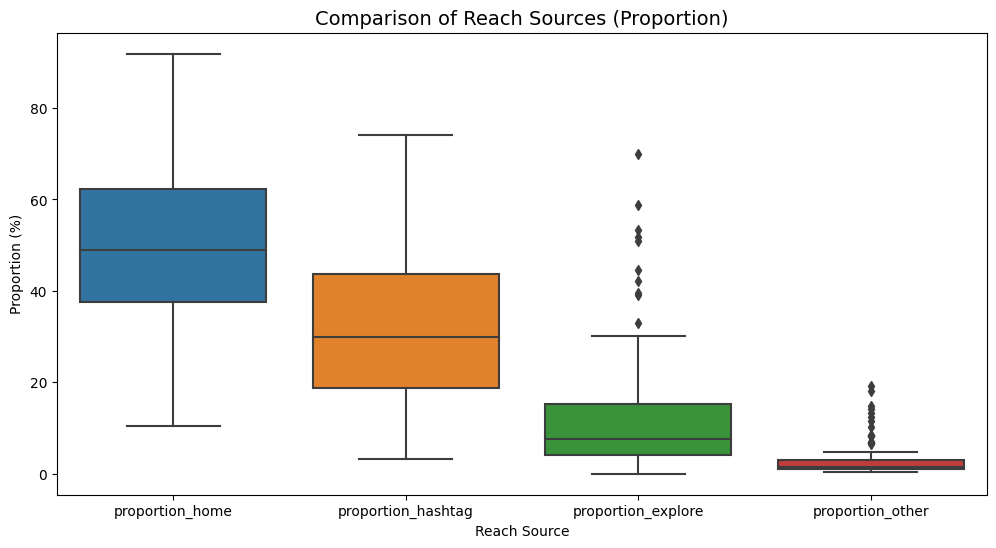

In [135]:
reach_sources = ['proportion_home', 'proportion_hashtag', 'proportion_explore', 'proportion_other']

if reach_sources:
    reach_data = all_data[reach_sources].melt(var_name="Source", value_name="Proportion")

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Source', y='Proportion', data=reach_data)
    plt.title('Comparison of Reach Sources (Proportion)', fontsize=14)
    plt.xlabel('Reach Source')
    plt.ylabel('Proportion (%)')
    plt.show()

**Key Insights**
- Home- <br>
With a median around 50%, The Home feed is consistently a major source of impressions, likely driven by followers who regularly see the content.
- Hashtags- <br>
With a median around 30%, Hashtags contribute significantly to reach but are more variable, indicating their effectiveness depends on the specific hashtags used.
- Explore- <br>
With a median around 10%, While the Explore page provides some reach, it’s less reliable. Posts that appear here (outliers) might have been highly engaging or optimized for discoverability.

Over all
- I can see that the main dominance is the "Home"
- posts can get a significant boost by hashtags
- the "Explore" outliers posts- are viral or having a really good engaement performance

Further Investigation
- Experiment with more targeted or trending hashtags to push impressions toward the higher end of the range.
- See if posts with higher engagement rates or visually appealing content are more likely to appear on the Explore page.
----


**Distribution of Follows Per Visit** and **Distribution of Follows Per Impression**

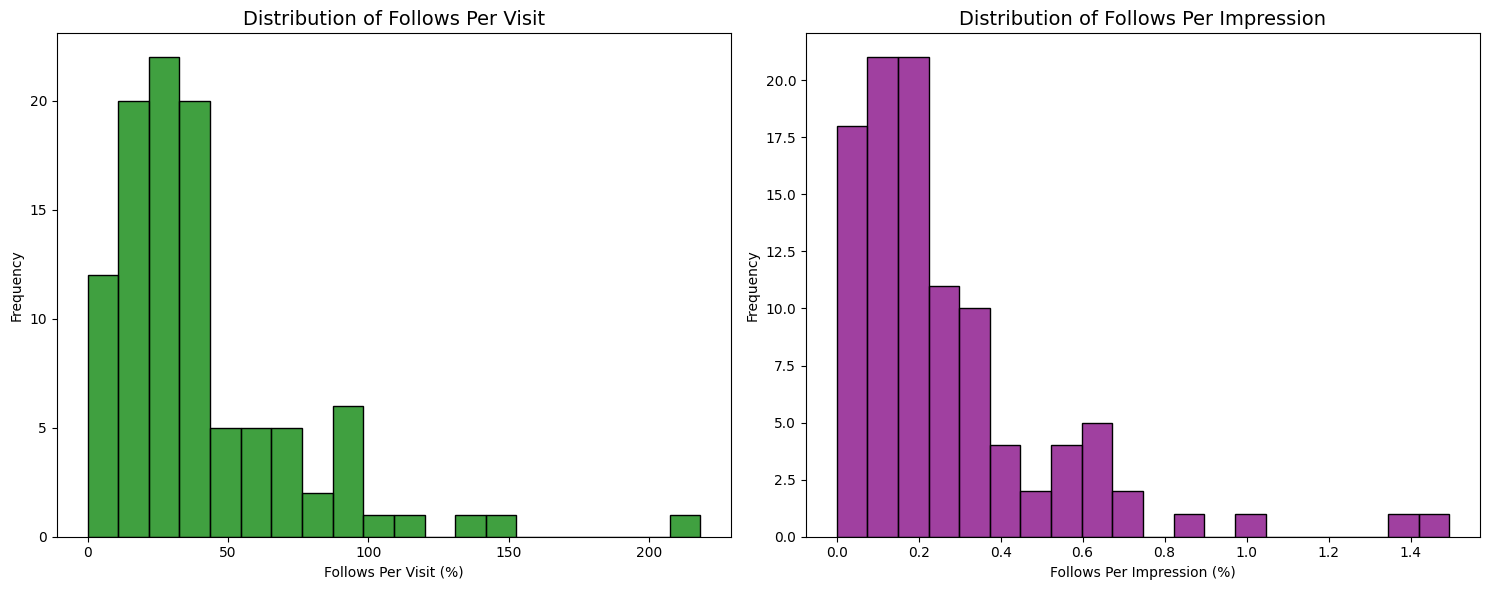

In [136]:
if 'follows_per_visit' in all_data.columns and 'follows_per_impression' in all_data.columns:
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    sns.histplot(all_data['follows_per_visit'], bins=20, color='green', ax=ax[0])
    ax[0].set_title('Distribution of Follows Per Visit', fontsize=14)
    ax[0].set_xlabel('Follows Per Visit (%)')
    ax[0].set_ylabel('Frequency')

    sns.histplot(all_data['follows_per_impression'], bins=20, color='purple', ax=ax[1])
    ax[1].set_title('Distribution of Follows Per Impression', fontsize=14)
    ax[1].set_xlabel('Follows Per Impression (%)')
    ax[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**Key Insights**<br>
**Follows Per Visit Distribution**- The percentage of profile visitors who convert into followers
- The majority of posts have a conversion rate between 10% and 40%, indicating that for most posts, only a small fraction of profile visitors choose to follow
- Posts with higher follow rates may have strong calls to action (CTAs) in the bio or captions, or they might showcase particularly compelling content.
- Posts with lower conversion rates could indicate a need to improve the content, CTA, or profile bio to encourage followers.

**Follows Per Impression Distribution**- The percentage of overall impressions that convert into followers
- The distribution is tightly concentrated, with most values below 0.4%
- A low follows-per-impression rate is typical, as not every impression leads to a profile visit or follow.
- Posts with higher rates likely capture attention with engaging visuals, effective use of hashtags, or other viral factors.
  
**Follows Per Visit vs. Follows Per Impression:**
- **Follows Per Visit** tends to be higher because it focuses only on users who take the extra step of visiting the profile.
- **Follows Per Impression** reflects overall follower conversion efficiency and is typically much lower since it includes all impressions, not just profile visits.

-------

**Save-to-Engagement Ratio** measures how much of the total engagement (likes, comments, shares) is driven by saves.<br>
Posts with a **higher save ratio** indicate content that users find particularly **valuable, inspirational, or worth revisiting.**

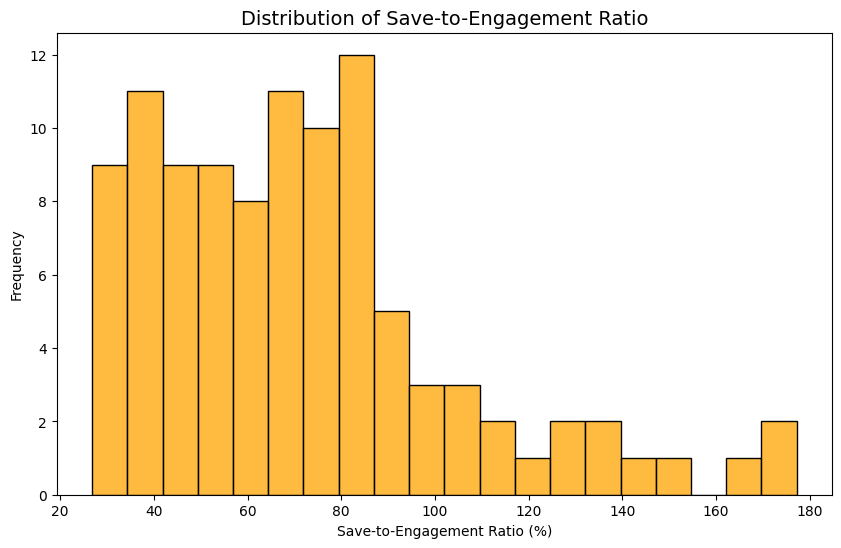

In [137]:
# 4. Save-to-Engagement Ratio
if 'save_ratio' in all_data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(all_data['save_ratio'], bins=20, color='orange')
    plt.title('Distribution of Save-to-Engagement Ratio', fontsize=14)
    plt.xlabel('Save-to-Engagement Ratio (%)')
    plt.ylabel('Frequency')
    plt.show()

**Key Insights**<br>
1. Peak Range (60%-80%)- **this is where I'd want to focus**<br>
The most frequent save ratios fall within this range. This suggests that for the majority of the posts, saves make up a significant portion of total engagement.
2. Long Tail (100% and above)-<br>
A few outliers have unusually high save ratios. These posts may represent unique content types that strongly resonate with the audience.
3. Low Ratio (Below 40%)-<br>
Posts with lower save ratios likely drive engagement more from likes, comments, or shares rather than saves.

----

Also, I'd want to look on the relationships between the different actions- Saves, Comments, Shares, Likes, Profile Visits and Follows

In [138]:
df2=all_data[['saves', 'comments', 'shares', 'likes', 'profile_visits', 'follows', 'impressions']].corr()
df2.style.apply(lambda table: ["background: red" if val > 0.5 or val < -0.5 else "" for val in table])

,saves,comments,shares,likes,profile_visits,follows,impressions
saves,1.000000,-0.003695,0.874004,0.843395,0.377424,0.647585,0.791448
comments,-0.003695,1.000000,0.012697,0.163383,0.136590,-0.029298,-0.008535
shares,0.874004,0.012697,1.000000,0.718790,0.265460,0.517278,0.654920
likes,0.843395,0.163383,0.718790,1.000000,0.642658,0.758234,0.852952
profile_visits,0.377424,0.136590,0.265460,0.642658,1.000000,0.852748,0.762679
follows,0.647585,-0.029298,0.517278,0.758234,0.852748,1.000000,0.889944
impressions,0.791448,-0.008535,0.654920,0.852952,0.762679,0.889944,1.000000


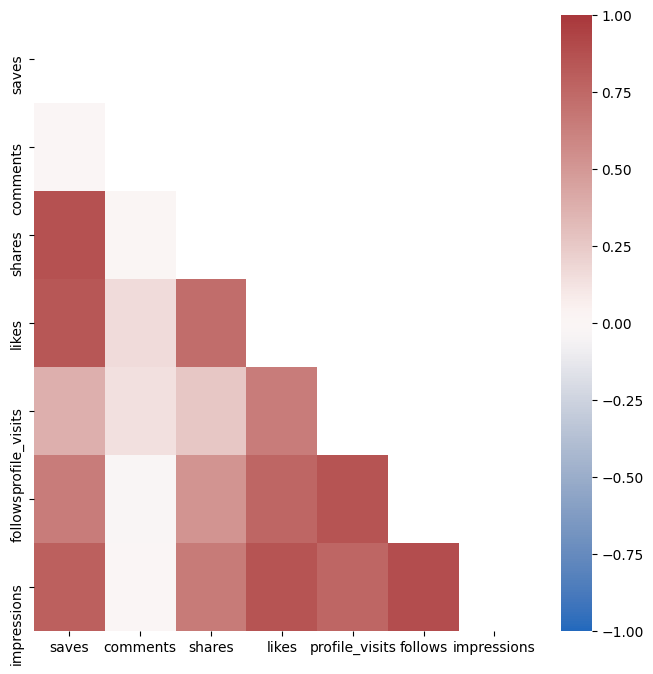

In [139]:
fig,axs=plt.subplots(figsize=(8,8))
mask = np.triu(np.ones_like(df2, dtype=bool))
sns.heatmap(df2, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

I can see that asside of the comments- all other metrics have a strong link to the impressions.<br>
Let's calculate the ocerall conversion rate:

In [140]:
conversion_rate = (all_data["follows"].sum() / all_data["profile_visits"].sum()) * 100
print(conversion_rate)

41.75035868005739


The conversion rate calculated shows that 41.75% of the people who visit the profile- will eventually turn into followers

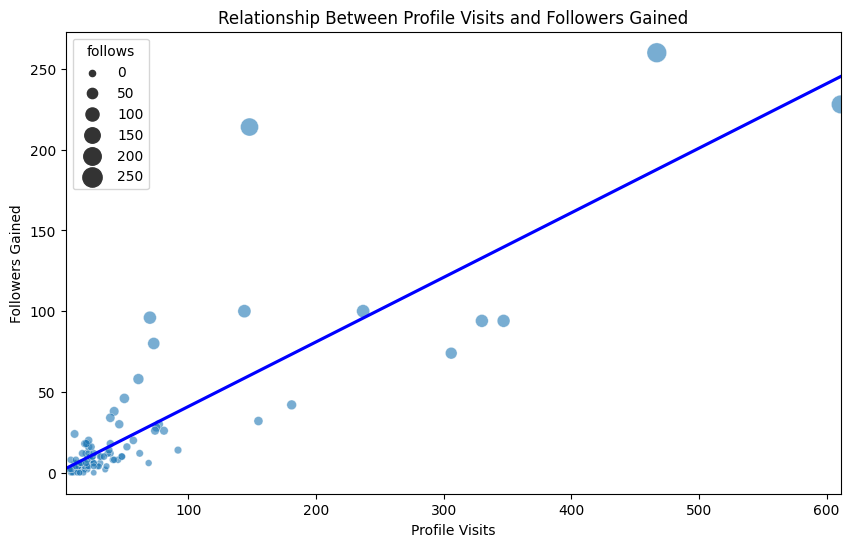

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_data, x="profile_visits", y="follows", size="follows", sizes=(20, 200), alpha=0.6)
sns.regplot(data=all_data, x="profile_visits", y="follows", scatter=False, color="blue", ci=None)  # Add trendline
plt.title("Relationship Between Profile Visits and Followers Gained")
plt.xlabel("Profile Visits")
plt.ylabel("Followers Gained")
plt.show()

I can see a linear relationship between the profile visits and the followers gained

For a simple ML model- I want to predict how many impressions a post will get, based on the likes, saves, shares and profile visits. <br>
Since the target column is discrete- I'll use linear and regression models, and evaluate it with MSE, MAE and $R^2$ <br>


In [142]:
# Define features (X) and target variable (y)
X = all_data[['likes', 'saves', 'shares', 'profile_visits']]  # Features
y = all_data['impressions']  # Target

# Check for missing values
print(all_data[['likes', 'saves', 'shares', 'profile_visits', 'impressions']].isnull().sum())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


likes             0
saves             0
shares            0
profile_visits    0
impressions       0
dtype: int64


**Linear Regression**

In [143]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (MAE): 1939.4504702056201
Mean Squared Error (MSE): 11961515.516476873
R^2 Score: 0.7574224115612871


I want to make a better model- let's see **Random Forest Regressor**<br>
An ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.

In [144]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R^2: {rf_r2}")


Random Forest MAE: 1351.6590476190474
Random Forest MSE: 7689910.274399999
Random Forest R^2: 0.844049870845842


Finally, I'll check an advanced model **XGB Regressor** <br>
A gradient-boosting framework that builds trees sequentially to minimize errors and improve predictions.

In [145]:
# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"XGBoost MAE: {xgb_mae}")
print(f"XGBoost MSE: {xgb_mse}")
print(f"XGBoost R^2: {xgb_r2}")


XGBoost MAE: 830.7765764508929
XGBoost MSE: 1214083.373736166
XGBoost R^2: 0.975378586721827


**Key Insights**
- XGBoost significantly outperforms both Linear Regression and Random Forest, achieving a much lower MAE and MSE, with an impressive R² of 0.975.
This indicates that XGBoost explains 97.5% of the variance in the target variable and has a high predictive power.

- Random Forest offers a substantial improvement over Linear Regression but doesn’t match the precision of XGBoost.
If computational efficiency is a concern, Random Forest might be a good balance.

- Linear Regression’s performance is reasonable, given its simplicity and the assumption of linearity. However, it cannot capture the non-linear relationships inherent in the data.

Next, I'll make a **Feature Importance** Analysis:<br>
Feature importance tells us which features (inputs) contribute the most to a model's predictions. This helps us:

1. Understand the impact of each feature.
2. Focus on critical features for further optimization.

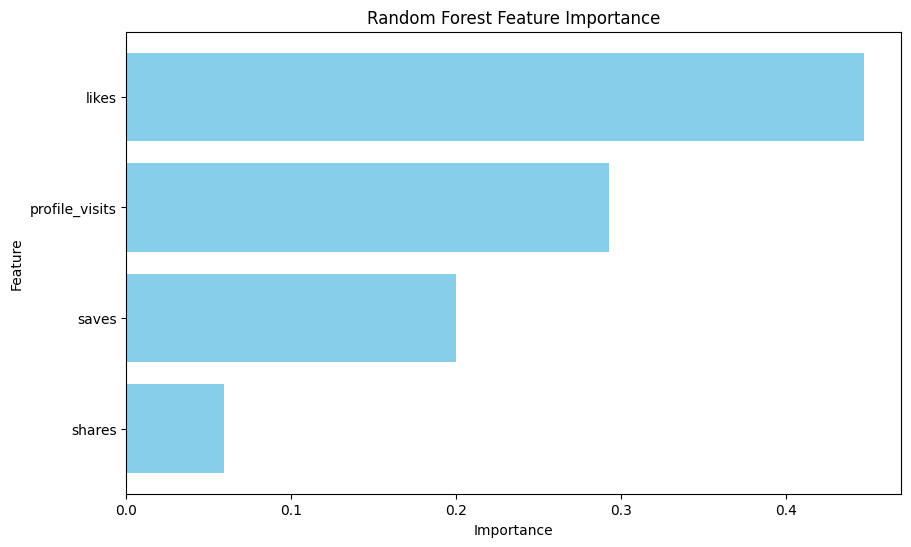

In [146]:

# Get feature importance from Random Forest
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


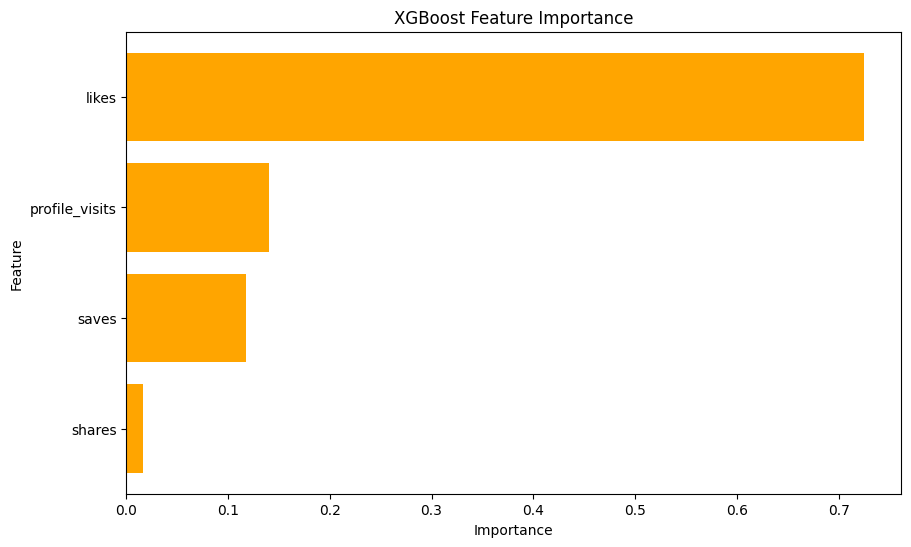

In [147]:
# Get feature importance from XGBoost
xgb_feature_importance = xgb_model.feature_importances_

# Create a DataFrame for better visualization
xgb_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='orange')
plt.gca().invert_yaxis()
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


As I can see from the feature importance analysis-
- Random Forest tends to distribute importance more evenly among features, indicating it captures more diverse interactions.
- XGBoost places a much stronger emphasis on likes, showing it prioritizes the most predictive feature.

**Key Insights**
1. Focus on Increasing Likes:
   - Both models highlight likes as the dominant driver for impressions.
   - Strategies: <br>
         - Encourage users to like posts (with CTAs in captions). <br>
         - Analyze content from high-like posts to replicate success.
2. Optimize Profile Visits:
    - Random Forest emphasizes the importance of profile visits more than XGBoost. Improving profile engagement could indirectly boost impressions.
    - Strategies: <br>
          - Strengthen call-to-action links to the profile in posts. <br>
          - Use hashtags or trends to attract profile clicks.
-----

After analyzing the data from the actions point of view, now I see that a lot of questions were brought up about the content and the hashtags involved in the posts.<br>
First, I'll look at the overall data- what are the most used words in the captions and what are the most used hashtags.


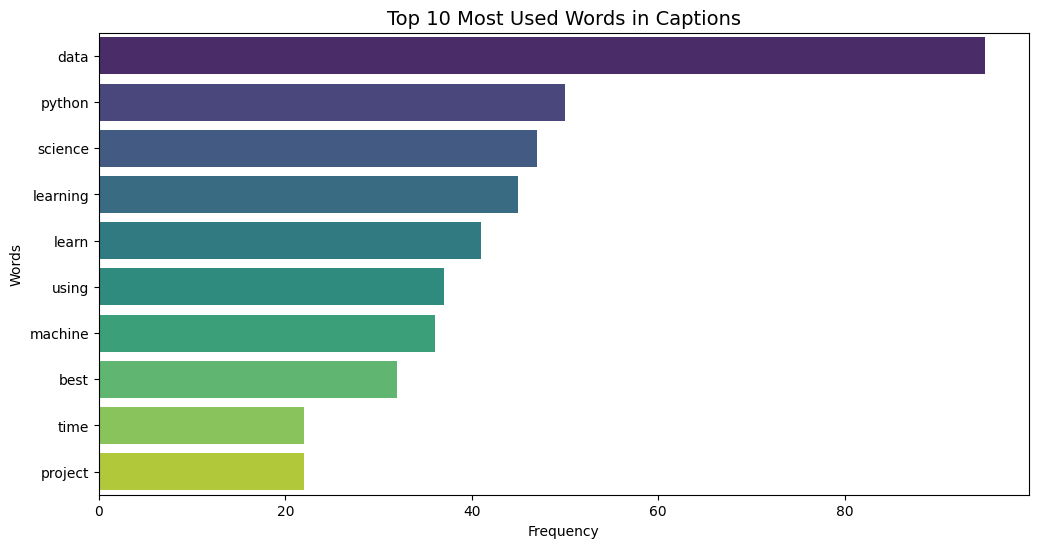

In [148]:
# Combine all captions into a single text string
text = " ".join(str(i) for i in all_data['caption'].dropna())

# Remove punctuation and convert text to lowercase
translator = str.maketrans('', '', string.punctuation)
cleaned_text = text.translate(translator).lower()

# Define custom stopwords
custom_stopwords = set(STOPWORDS)
additional_stopwords = {"i", "am", "will", "are", "is", "was", "were", "be", "been", "you", "your", "he", "she", "it", "we", "they", "me", "my", "mine", "our", "ours", "yours", "the"}
custom_stopwords.update(additional_stopwords)

# Split text into words and remove stopwords
words = [word for word in cleaned_text.split() if word not in custom_stopwords]

# Count the frequency of words
word_counts = Counter(words)

# Convert to a DataFrame for better visualization
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot top 10 words
plt.figure(figsize=(12, 6))
sns.barplot(data=word_counts_df.head(10), x='Frequency', y='Word', palette='viridis')
plt.title('Top 10 Most Used Words in Captions', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

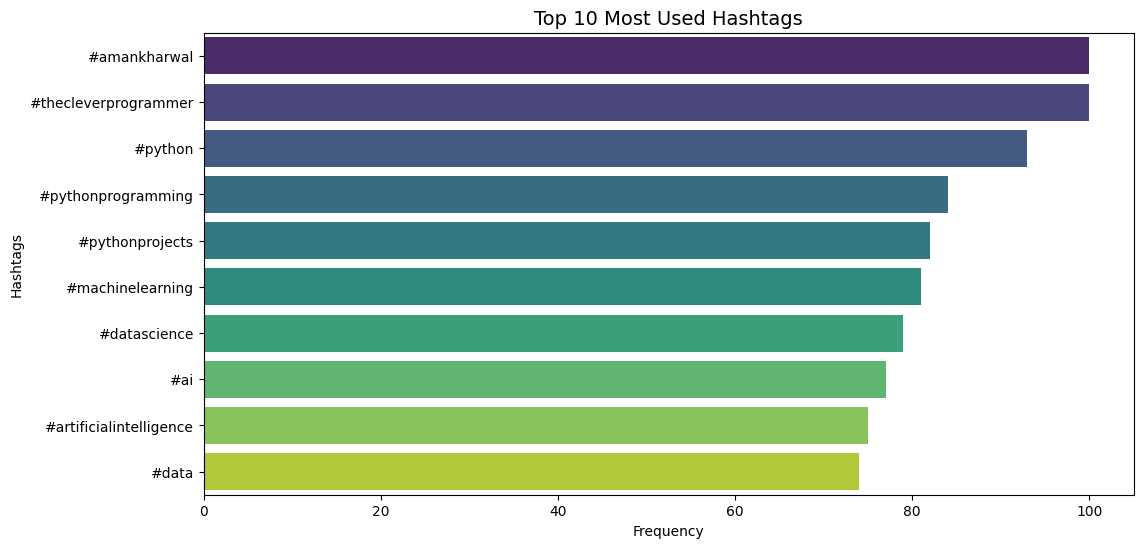

In [149]:
# Ensure hashtags are cleaned and split properly
# Split hashtags by spaces
all_data['individual_hashtags'] = all_data['hashtags'].str.split()  # Split by spaces

# Explode the list of hashtags into individual rows
hashtags_data = all_data.explode('individual_hashtags')

# Ensure hashtags start with "#" and remove whitespace
hashtags_data['individual_hashtags'] = hashtags_data['individual_hashtags'].str.strip()
hashtags_data = hashtags_data[hashtags_data['individual_hashtags'].str.startswith('#')]  # Keep valid hashtags

# Count the frequency of each hashtag
hashtag_counts = hashtags_data['individual_hashtags'].value_counts()

# Convert to a DataFrame for better visualization
hashtag_counts_df = hashtag_counts.reset_index()
hashtag_counts_df.columns = ['Hashtag', 'Frequency']

plt.figure(figsize=(12, 6))
sns.barplot(data=hashtag_counts_df.head(10), x='Frequency', y='Hashtag', palette='viridis')
plt.title('Top 10 Most Used Hashtags', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.show()


My final goal is to grow the audience- so I want to focus on what words/hashtags converts visitors to followers.
I'll use the follows_per_visit and follows_per_impression metrics.

As I saw in the Follows Per Visit Distribution- I'd want to focus on the top words/hashtags where the rate is above 10% and under 40%

In [150]:
df1=all_data[(all_data['follows_per_visit']>10) & (all_data['follows_per_visit']<40)]

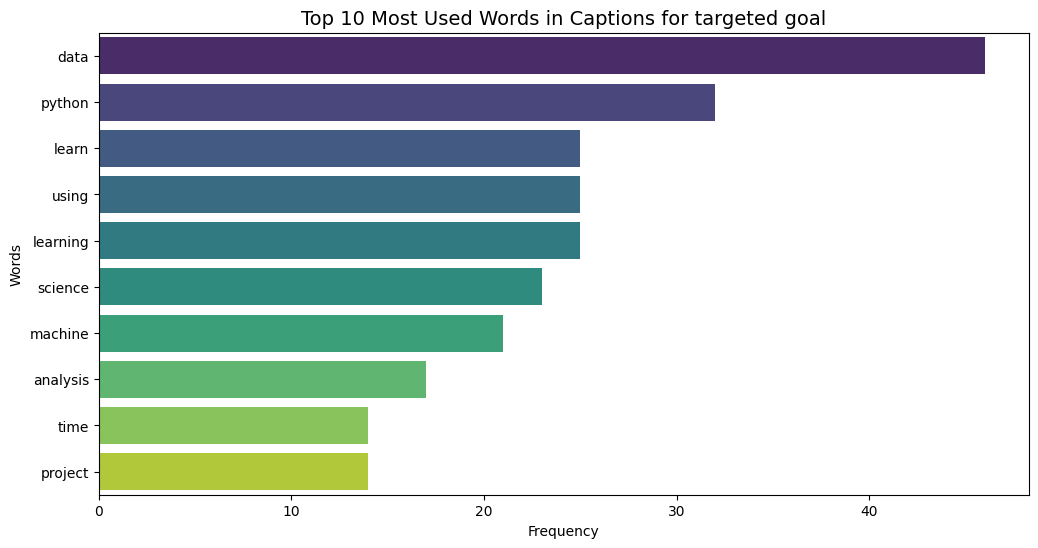

In [151]:
# Combine all captions into a single text string
text = " ".join(str(i) for i in df1['caption'].dropna())

# Remove punctuation and convert text to lowercase
translator = str.maketrans('', '', string.punctuation)
cleaned_text = text.translate(translator).lower()

# Define custom stopwords
custom_stopwords = set(STOPWORDS)
additional_stopwords = {"i", "am", "will", "are", "is", "was", "were", "be", "been", "you", "your", "he", "she", "it", "we", "they", "me", "my", "mine", "our", "ours", "yours", "the"}
custom_stopwords.update(additional_stopwords)

# Split text into words and remove stopwords
words = [word for word in cleaned_text.split() if word not in custom_stopwords]

# Count the frequency of words
word_counts = Counter(words)

# Convert to a DataFrame for better visualization
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot top 10 words
plt.figure(figsize=(12, 6))
sns.barplot(data=word_counts_df.head(10), x='Frequency', y='Word', palette='viridis')
plt.title('Top 10 Most Used Words in Captions for targeted goal', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

I want to see the relationship between these top words to the impressions of the posts

In [152]:
# List of top words
top_words =['data', 'python', 'learn', 'using', 'learning', 'science', 'machine', 'analysis', 'time', 'project']

# Create a binary column for each word
for word in top_words:
    all_data[f'contains_{word}'] = all_data['caption'].apply(lambda x: 1 if word in x.lower() else 0)

# Analyze the relationship between word presence and impressions
word_impressions = []

for word in top_words:
    avg_impressions = all_data.groupby(f'contains_{word}')['impressions'].mean()
    word_impressions.append({'Word': word, 'Absent': avg_impressions[0], 'Present': avg_impressions[1]})

# Convert results to a DataFrame
word_impressions_df = pd.DataFrame(word_impressions)
print(word_impressions_df)

       Word       Absent      Present
0      data  6183.000000  5695.727273
1    python  5489.333333  6466.088889
2     learn  6018.431034  5790.840909
3     using  6077.880597  5618.514286
4  learning  5898.430380  5995.217391
5   science  5451.485294  6857.794118
6   machine  5874.725000  6085.818182
7  analysis  6007.066667  5269.166667
8      time  5779.540230  6736.400000
9   project  5312.229730  7527.178571


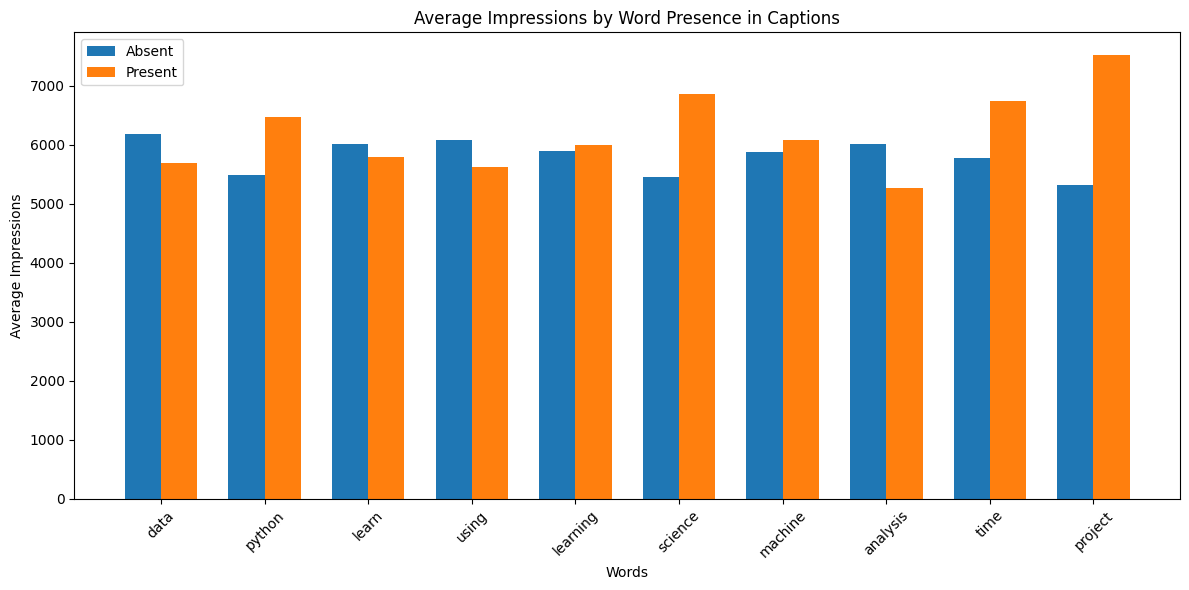

In [153]:
x = np.arange(len(top_words))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for absent and present
rects1 = ax.bar(x - width/2, word_impressions_df['Absent'], width, label='Absent')
rects2 = ax.bar(x + width/2, word_impressions_df['Present'], width, label='Present')

# Add labels, title, and legend
ax.set_xlabel('Words')
ax.set_ylabel('Average Impressions')
ax.set_title('Average Impressions by Word Presence in Captions')
ax.set_xticks(x)
ax.set_xticklabels(word_impressions_df['Word'], rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


I want to see performance over the different places the likes came from:

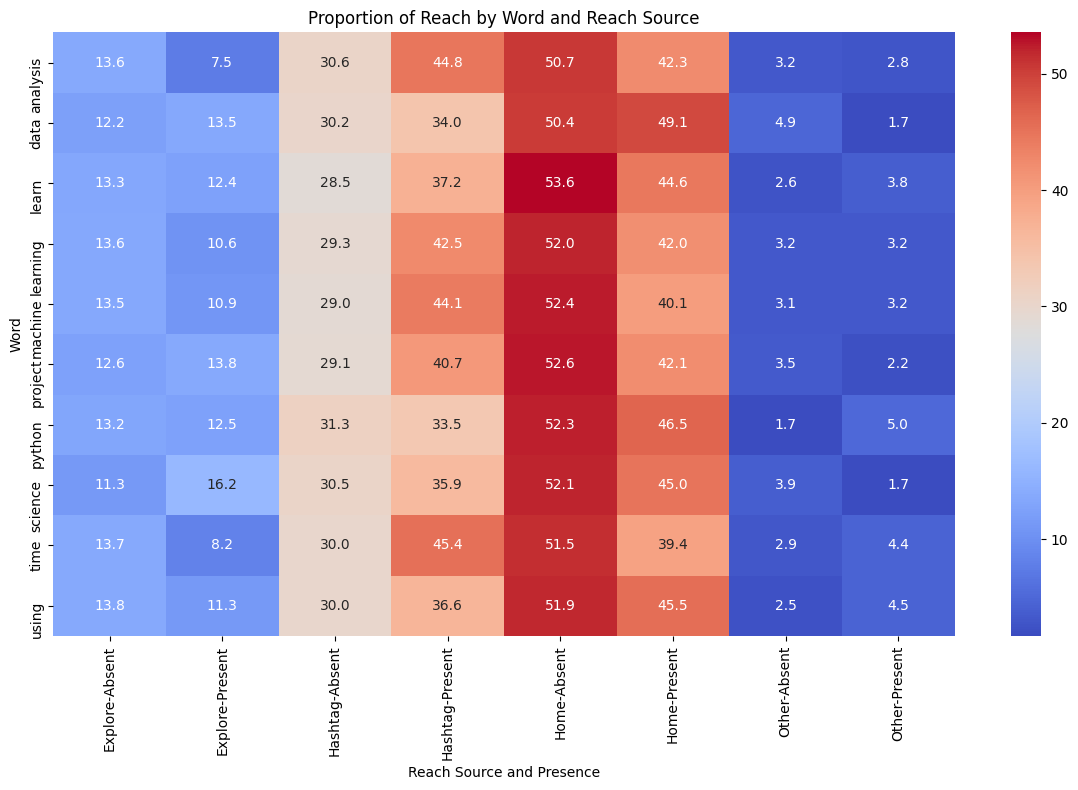

In [168]:
# Analyze reach proportions for top words
word_reach_proportions = []

for word in top_words:
    # Group by presence or absence of the word
    avg_reach = all_data.groupby(f'contains_{word}').agg({
        'proportion_home': 'mean',
        'proportion_hashtag': 'mean',
        'proportion_explore': 'mean',
        'proportion_other': 'mean'
    })

    word_reach_proportions.append({
        'Word': word,
        'Home_Absent': avg_reach.loc[0, 'proportion_home'] if 0 in avg_reach.index else 0,
        'Home_Present': avg_reach.loc[1, 'proportion_home'] if 1 in avg_reach.index else 0,
        'Hashtag_Absent': avg_reach.loc[0, 'proportion_hashtag'] if 0 in avg_reach.index else 0,
        'Hashtag_Present': avg_reach.loc[1, 'proportion_hashtag'] if 1 in avg_reach.index else 0,
        'Explore_Absent': avg_reach.loc[0, 'proportion_explore'] if 0 in avg_reach.index else 0,
        'Explore_Present': avg_reach.loc[1, 'proportion_explore'] if 1 in avg_reach.index else 0,
        'Other_Absent': avg_reach.loc[0, 'proportion_other'] if 0 in avg_reach.index else 0,
        'Other_Present': avg_reach.loc[1, 'proportion_other'] if 1 in avg_reach.index else 0,
    })

# Convert results to a DataFrame
word_reach_proportions_df = pd.DataFrame(word_reach_proportions)

# Restructure the data for a heatmap
melted_df = word_reach_proportions_df.melt(
    id_vars=['Word'], 
    value_vars=['Home_Absent', 'Home_Present', 'Hashtag_Absent', 'Hashtag_Present', 
                'Explore_Absent', 'Explore_Present', 'Other_Absent', 'Other_Present'],
    var_name='Reach_Source_Presence',
    value_name='Proportion'
)

# Split 'Reach_Source_Presence' into separate columns for better visualization
melted_df[['Reach_Source', 'Presence']] = melted_df['Reach_Source_Presence'].str.split('_', expand=True)

# Pivot the data
heatmap_data = melted_df.pivot_table(index='Word', columns=['Reach_Source', 'Presence'], values='Proportion')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Proportion of Reach by Word and Reach Source')
plt.xlabel('Reach Source and Presence')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


**Key Insights**
1. science, project, and machine learning:
    - These words have high proportions in the Home-Present category (e.g., 52.4%, 52.6%).
    - Posts containing these words resonate well with followers and are likely reaching users' feeds directly.
2. time and using:
    - These words have relatively higher proportions in the Explore-Present category (e.g., 13.7%, 13.8%).
    - Posts with these words are more likely to gain visibility through Instagram's Explore feature.
3. learn, learning, and python:
    - These words have higher proportions in the Hashtag-Present category (e.g., 53.6%, 52.6%).
    - Posts containing these words are benefiting significantly from hashtag visibility.

**Straregies**
1. Target New Audiences: Use words like time and using in captions and pair them with Explore-friendly hashtags to maximize new reach.
2. Leverage Direct Feeds: Include high-impact words like science and project in posts to increase engagement with existing audiences.
3. Refine Hashtag Use: Pair words like learn, learning, and python with relevant hashtags to improve discoverability.

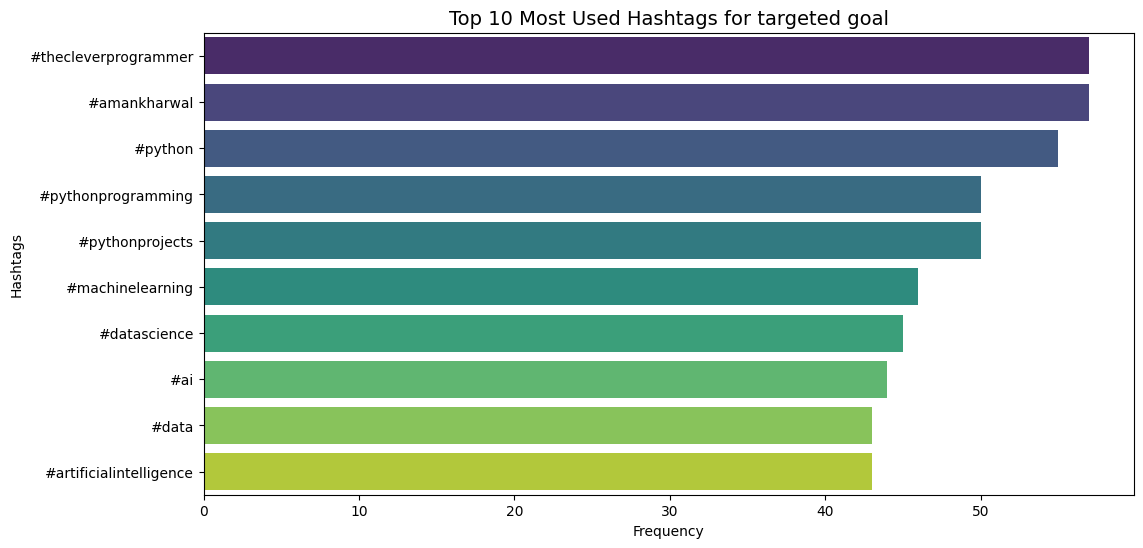

In [154]:
# Ensure hashtags are cleaned and split properly
# Split hashtags by spaces
df1['individual_hashtags'] = df1['hashtags'].str.split()  # Split by spaces

# Explode the list of hashtags into individual rows
hashtags_data = df1.explode('individual_hashtags')

# Ensure hashtags start with "#" and remove whitespace
hashtags_data['individual_hashtags'] = hashtags_data['individual_hashtags'].str.strip()
hashtags_data = hashtags_data[hashtags_data['individual_hashtags'].str.startswith('#')]  # Keep valid hashtags

# Count the frequency of each hashtag
hashtag_counts = hashtags_data['individual_hashtags'].value_counts()

# Convert to a DataFrame for better visualization
hashtag_counts_df = hashtag_counts.reset_index()
hashtag_counts_df.columns = ['Hashtag', 'Frequency']

plt.figure(figsize=(12, 6))
sns.barplot(data=hashtag_counts_df.head(10), x='Frequency', y='Hashtag', palette='viridis')
plt.title('Top 10 Most Used Hashtags for targeted goal', fontsize=14)
plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.show()


In [157]:
# List of top 10 hashtags
top_hashtags = [
    '#thecleverprogrammer', '#amankharwal', '#python',
    '#pythonprogramming', '#pythonprojects', '#machinelearning',
    '#datascience', '#ai', '#data', '#artificialintelligence'
]

# Create binary columns for each hashtag
for hashtag in top_hashtags:
    all_data[f'contains_{hashtag}'] = all_data['hashtags'].apply(lambda x: 1 if hashtag in str(x).split() else 0)

# Analyze the relationship between hashtag presence and impressions
hashtag_impressions = []

for hashtag in top_hashtags:
    avg_impressions = all_data.groupby(f'contains_{hashtag}')['impressions'].mean()
    hashtag_impressions.append({
        'Hashtag': hashtag,
        'Absent': avg_impressions.get(0, 0),  # Handle cases where no data for 0
        'Present': avg_impressions.get(1, 0)  # Handle cases where no data for 1
    })

# Convert results to a DataFrame
hashtag_impressions_df = pd.DataFrame(hashtag_impressions)
print(hashtag_impressions_df)


                   Hashtag        Absent      Present
0     #thecleverprogrammer   3304.500000  5972.570000
1             #amankharwal   3304.500000  5972.570000
2                  #python  10725.555556  5455.225806
3       #pythonprogramming   7194.166667  5647.273810
4          #pythonprojects   5497.531250  6113.500000
5         #machinelearning   6768.857143  5700.246914
6             #datascience   6448.565217  5766.443038
7                      #ai   6277.120000  5804.389610
8                    #data   6578.357143  5671.243243
9  #artificialintelligence   6028.333333  5881.346667


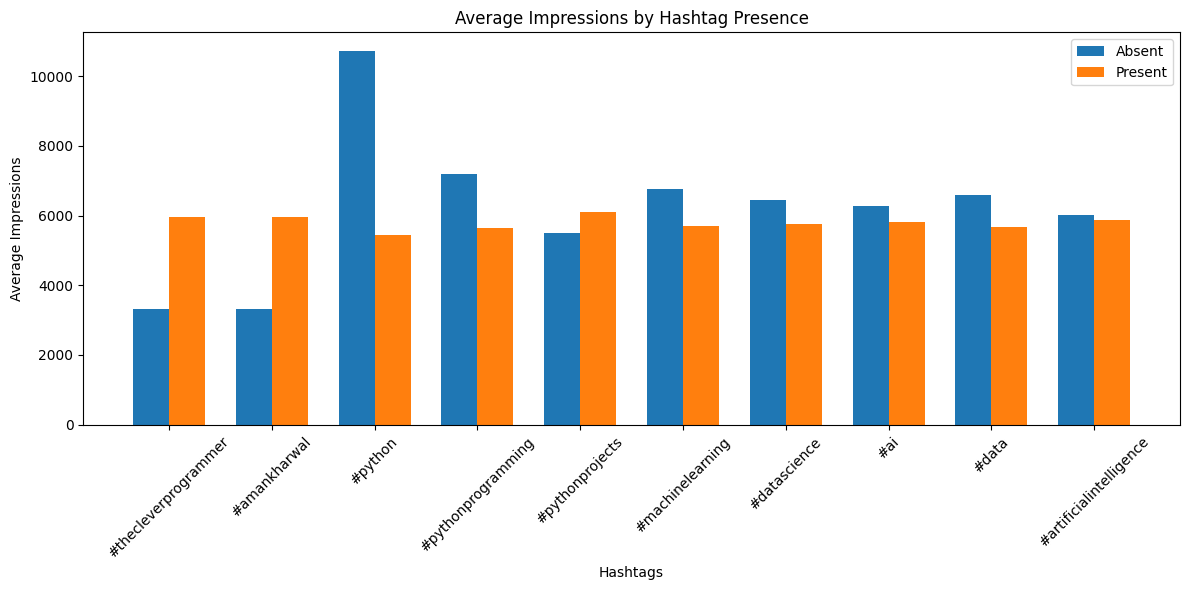

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the results
x = np.arange(len(top_hashtags))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Bars for absent and present
rects1 = ax.bar(x - width/2, hashtag_impressions_df['Absent'], width, label='Absent')
rects2 = ax.bar(x + width/2, hashtag_impressions_df['Present'], width, label='Present')

# Add labels, title, and legend
ax.set_xlabel('Hashtags')
ax.set_ylabel('Average Impressions')
ax.set_title('Average Impressions by Hashtag Presence')
ax.set_xticks(x)
ax.set_xticklabels(hashtag_impressions_df['Hashtag'], rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


I want to see performance over the different places the likes came from:

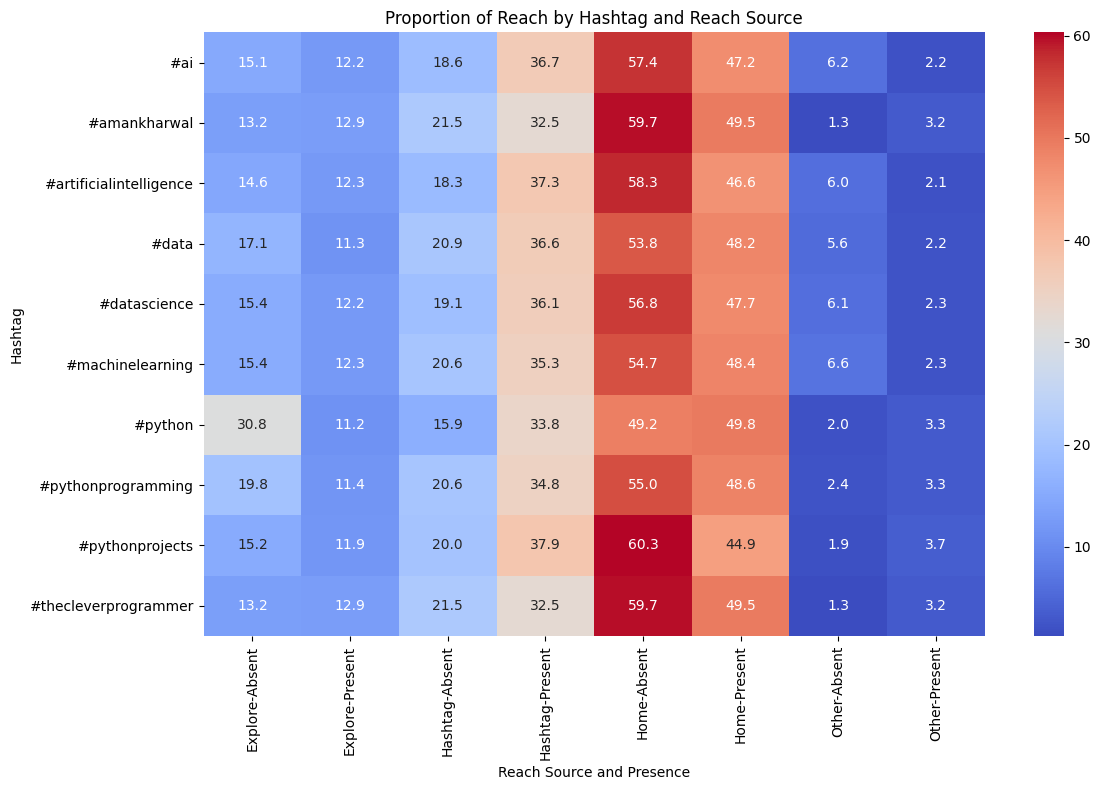

In [164]:
# Analyze reach proportions for top hashtags
hashtag_reach_proportions = []

for hashtag in top_hashtags:
    # Group by presence or absence of the hashtag
    avg_reach = all_data.groupby(f'contains_{hashtag}').agg({
        'proportion_home': 'mean',
        'proportion_hashtag': 'mean',
        'proportion_explore': 'mean',
        'proportion_other': 'mean'
    })

    hashtag_reach_proportions.append({
        'Hashtag': hashtag,
        'Home_Absent': avg_reach.loc[0, 'proportion_home'] if 0 in avg_reach.index else 0,
        'Home_Present': avg_reach.loc[1, 'proportion_home'] if 1 in avg_reach.index else 0,
        'Hashtag_Absent': avg_reach.loc[0, 'proportion_hashtag'] if 0 in avg_reach.index else 0,
        'Hashtag_Present': avg_reach.loc[1, 'proportion_hashtag'] if 1 in avg_reach.index else 0,
        'Explore_Absent': avg_reach.loc[0, 'proportion_explore'] if 0 in avg_reach.index else 0,
        'Explore_Present': avg_reach.loc[1, 'proportion_explore'] if 1 in avg_reach.index else 0,
        'Other_Absent': avg_reach.loc[0, 'proportion_other'] if 0 in avg_reach.index else 0,
        'Other_Present': avg_reach.loc[1, 'proportion_other'] if 1 in avg_reach.index else 0,
    })

# Convert results to a DataFrame
hashtag_reach_proportions_df = pd.DataFrame(hashtag_reach_proportions)

# Restructure the data for a heatmap
melted_df = hashtag_reach_proportions_df.melt(
    id_vars=['Hashtag'], 
    value_vars=['Home_Absent', 'Home_Present', 'Hashtag_Absent', 'Hashtag_Present', 
                'Explore_Absent', 'Explore_Present', 'Other_Absent', 'Other_Present'],
    var_name='Reach_Source_Presence',
    value_name='Proportion'
)

# Split 'Reach_Source_Presence' into separate columns for better visualization
melted_df[['Reach_Source', 'Presence']] = melted_df['Reach_Source_Presence'].str.split('_', expand=True)

# Pivot the data
heatmap_data = melted_df.pivot_table(index='Hashtag', columns=['Reach_Source', 'Presence'], values='Proportion')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Proportion of Reach by Hashtag and Reach Source')
plt.xlabel('Reach Source and Presence')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

**Key Insights**
1. Hashtags like #pythonprojects and #datascience:
    - Have strong proportions coming directly from the "Hashtag" source (Hashtag Present values are much higher than Absent values).
2. Hashtags like #ai, #machinelearning, and #datascience:
    - Show higher engagement through Explore (Explore Present values are higher than absent), highlighting their effectiveness in gaining visibility through the Explore feature.

**Strategies**
1. Focus on Hashtags That Drive Home Feed Engagement: Prioritize hashtags like #python, #data, and #pythonprogramming for posts targeted toward followers and direct feeds.
2. Leverage Explore-Friendly Hashtags: Use hashtags like #ai, #machinelearning, and #datascience for broader visibility in the Explore feed.
3. Enhance Hashtag-Specific Content: For hashtags like #pythonprojects, create content tailored for users actively searching through hashtags.
4. Avoid Overloading With Low-Impact Hashtags: Limit the use of hashtags with minimal contributions to both "Home" and "Explore," such as #amankharwal.